In [1]:
import numpy as np 
import pandas as pd

from K_means import Kmeans
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from scipy.spatial.distance import cdist

import string

from nltk.corpus import stopwords

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import neattext.functions as nfx

from textblob import TextBlob as tb
from textblob import Word

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore')

In [2]:
august=pd.read_csv('06_PREPROCESSED_AUGUST.csv')

In [3]:
custom_words = ['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather',
                'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come', '%', '.', 'the', 'etc', 'pls', 'btw', 'let', 'hgd', 'get', 'amp', 'gt','lt','hrs','dos','say','reply','sir','replying','coronavirus','death','youth','old','lover','people','sri']

In [4]:
for i in range(0,august.shape[0]):
    august['clean_tweet'][i]= ''.join([i for i in august['clean_tweet'][i] if not i.isdigit()])
    august['clean_tweet'][i]=august['clean_tweet'][i].lower()
    august['clean_tweet'][i]=nfx.remove_custom_words(august['clean_tweet'][i],custom_words)

In [5]:
tweets_august=august['clean_tweet']

In [6]:
tweet_list_august = tweets_august.apply(nfx.remove_stopwords)
tweet_list_august = tweet_list_august .apply(nfx.remove_special_characters)
tweet_list_august = tweet_list_august.apply(nfx.remove_punctuations)

In [7]:
def remove_single_char(list):
    for token in list:
        if( len(token)==1):
            list.remove(token)
def remove_dual_char(list):
    for token in list:
        if( len(token)==2):
            list.remove(token)
def remove_words(list1, remove_words):
    for word in list(list1):
        if word in remove_words:
            list1.remove(word)
    return list1   

In [8]:
def Convert_list(string):
    li = list(string.split(" "))
    return li
def listToString(s): 
    str1 = " " 
    return (str1.join(s))

In [9]:
for i in range(0,august.shape[0]):
    ls=Convert_list(tweet_list_august[i])
    remove_single_char(ls)
    remove_dual_char(ls)
    ls=remove_words(ls,custom_words)
    tweet_list_august[i]=listToString(ls)

In [10]:
def my_lemma(token,i=0):
    word=tb(token)
    tags=word.tags
    sample=Word(tags[0][0])
    if tags[0][1][0] =='V':
        x=sample.lemmatize('v')
        ls[i]=x
    else:
        x=sample.lemmatize()
        ls[i]=x

In [11]:
for i in range(0,august.shape[0]):
    ls=Convert_list(tweet_list_august[i])
    for j in range(0,len(ls)):
        text=ls[j]
        if(text==""):
                continue
        word=tb(text)
        tags=word.tags
        sample=Word(tags[0][0])
        if tags[0][1][0] =='V':
                x=sample.lemmatize('v')
                ls[j]=x
        else:
                x=sample.lemmatize()
                ls[j]=x

In [12]:
for i in range(0,august.shape[0]):
    ls=Convert_list(tweet_list_august[i])
    for j in range(0,len(ls)):
        text=ls[j]
        if(text==""):
            continue
        my_lemma(text,j)
    tweet_list_august[i]=listToString(ls)

In [13]:
for i in range(0,august.shape[0]):
    ls=Convert_list(tweet_list_august[i])
    

In [14]:
for i in range(0,august.shape[0]):
    ls=Convert_list(tweet_list_august[i])
    ls=remove_words(ls,custom_words)
    tweet_list_august[i]=listToString(ls)

In [15]:
august['clean_tweet']=tweet_list_august

In [16]:
august['clean_tweet']

0       treatment covid hydroquinone ivermectin zincov...
1       yes oxygen remdesivir versus hindumuslim agend...
2       pt remdesivir tociluzimab urgently wid icu bed...
3        citizen india request oxygen remdesivir remember
4                remdesivir india reach help flight covid
                              ...                        
1693    thought thing normal end covid vaccine availab...
1694          covid vaccination pregnancy srishti clin...
1695    covid advisor new lockdown expect despite delt...
1696                  covid vaccine prioritize distribute
1697    update schedule announce withdrawn participate...
Name: clean_tweet, Length: 1698, dtype: object

In [17]:
ps=PorterStemmer()

In [18]:
ls=august['clean_tweet'][0]
ls

'treatment covid hydroquinone ivermectin zincovit celine vitc paracetamol doxy antibody cocktail dexamethasone azithromycin remdesivir frapivir oxygen vaccinate prevent'

In [19]:
words = word_tokenize(ls)
words

['treatment',
 'covid',
 'hydroquinone',
 'ivermectin',
 'zincovit',
 'celine',
 'vitc',
 'paracetamol',
 'doxy',
 'antibody',
 'cocktail',
 'dexamethasone',
 'azithromycin',
 'remdesivir',
 'frapivir',
 'oxygen',
 'vaccinate',
 'prevent']

In [20]:
st=""

In [21]:
for w in words:
    w=ps.stem(w)
    st+=w+' '

In [22]:
st

'treatment covid hydroquinon ivermectin zincovit celin vitc paracetamol doxi antibodi cocktail dexamethason azithromycin remdesivir frapivir oxygen vaccin prevent '

In [23]:
for i in range(0,august.shape[0]):
    ls=august['clean_tweet'][i]
    words = word_tokenize(ls)
    st=""
    for w in words:
        w=ps.stem(w)
        st+=w+' '
    august['clean_tweet'][i]=st

In [24]:
august['clean_tweet'][6]

'india remdesivir product capac increas lakh vial month june govern namo app '

In [25]:
tweet_list_august=august['clean_tweet']

In [26]:
tweet_list_august[7]

'report india prepar possibl covid wave current lakh remdesivir medicin stock plant hospit lakh bed india plan restart vaccin export novemb '

In [27]:
for i in range(0,august.shape[0]):
    ls=Convert_list(tweet_list_august[i])
    remove_single_char(ls)
    remove_dual_char(ls)
    ls=remove_words(ls,custom_words)
    tweet_list_august[i]=listToString(ls)

In [28]:
august['clean_tweet']=tweet_list_august

# K-Means

In [29]:
data =august['clean_tweet']

tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [30]:
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names())

,aaand,aab,aadhar,aala,aam,aameen,aandolan,aapk,aapko,aayega,...,zia,ziauddin,zilla,zincovit,zone,zoo,zoom,zycovd,zydu,zyjgk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.268995,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


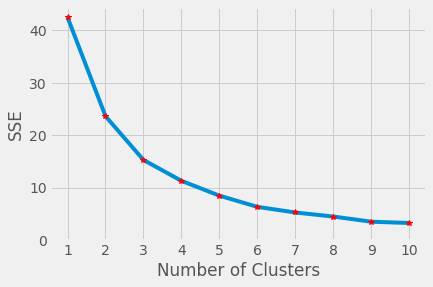

In [31]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans_kwargs = {"init": "k-means++","n_init": 2,"max_iter": 1000,"random_state": 42,}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(Y_sklearn)
    sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.plot(range(1, 11), sse,'r*')
plt.xticks(range(1, 11))
plt.yticks(range(0,50,10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


In [32]:
Y_sklearn

array([[-0.03930086,  0.04031515],
       [-0.03670648, -0.0306022 ],
       [-0.04274822, -0.01545738],
       ...,
       [ 0.03300172,  0.0353267 ],
       [-0.0417132 ,  0.17516395],
       [-0.00918007,  0.02849582]])

For n_clusters = 2 The average silhouette_score is : 0.7645287257975962
For n_clusters = 3 The average silhouette_score is : 0.4340560295923786
For n_clusters = 4 The average silhouette_score is : 0.4557768252551419
For n_clusters = 5 The average silhouette_score is : 0.4839877321682685
For n_clusters = 6 The average silhouette_score is : 0.4236578244155438
For n_clusters = 7 The average silhouette_score is : 0.4052221551668321
For n_clusters = 8 The average silhouette_score is : 0.47581923609247717
For n_clusters = 9 The average silhouette_score is : 0.42884230562996495
For n_clusters = 10 The average silhouette_score is : 0.41761782721056956


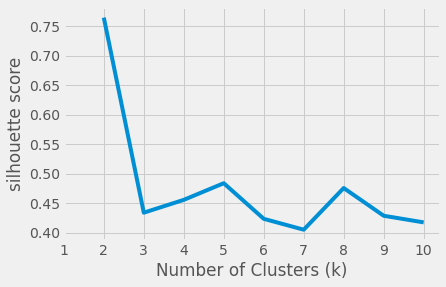

In [33]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.style as style
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, **kmeans_kwargs)
    cluster_labels = clusterer.fit_predict(Y_sklearn)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Y_sklearn, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Y_sklearn, cluster_labels)
style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.xticks(range(1, 11))
plt.show()

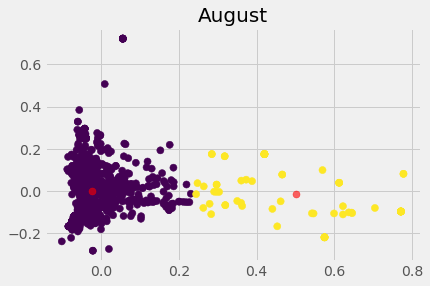

In [34]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=2, max_iter=1000,n_init=2, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

centers = fitted.cluster_centers_
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='red', s=50, alpha=0.6);
# plt.xlabel("Feature space for the 1st feature")
# plt.ylabel("Feature space for the 2nd feature")
plt.title('August',fontsize=20)
plt.show()

In [35]:
labels = np.unique(prediction)
dfs1 = []
for label in labels:
    id_temp = np.where(prediction==label) 
    x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
    sorted_means = np.argsort(x_means)[::-1]
    features = tf_idf_vectorizor.get_feature_names()
    best_features = [(features[i], x_means[i]) for i in sorted_means]
    df = pd.DataFrame(best_features, columns = ['features', 'score'])
    dfs1.append(df)

In [36]:
dfs1[0]

,features,score
0,covid,0.051623
1,vaccin,0.035185
2,corona,0.027781
3,curfew,0.020989
4,india,0.018364
...,...,...
4810,joseph,0.000000
4811,ampact,0.000000
4812,row,0.000000
4813,notabl,0.000000


In [37]:
dfs1[1]

,features,score
0,case,0.280960
1,report,0.265506
2,today,0.183828
3,far,0.148978
4,new,0.138769
...,...,...
4810,philippin,0.000000
4811,phir,0.000000
4812,phone,0.000000
4813,photo,0.000000


In [38]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array,prediction, 10)

In [39]:
august_cluster=dfs

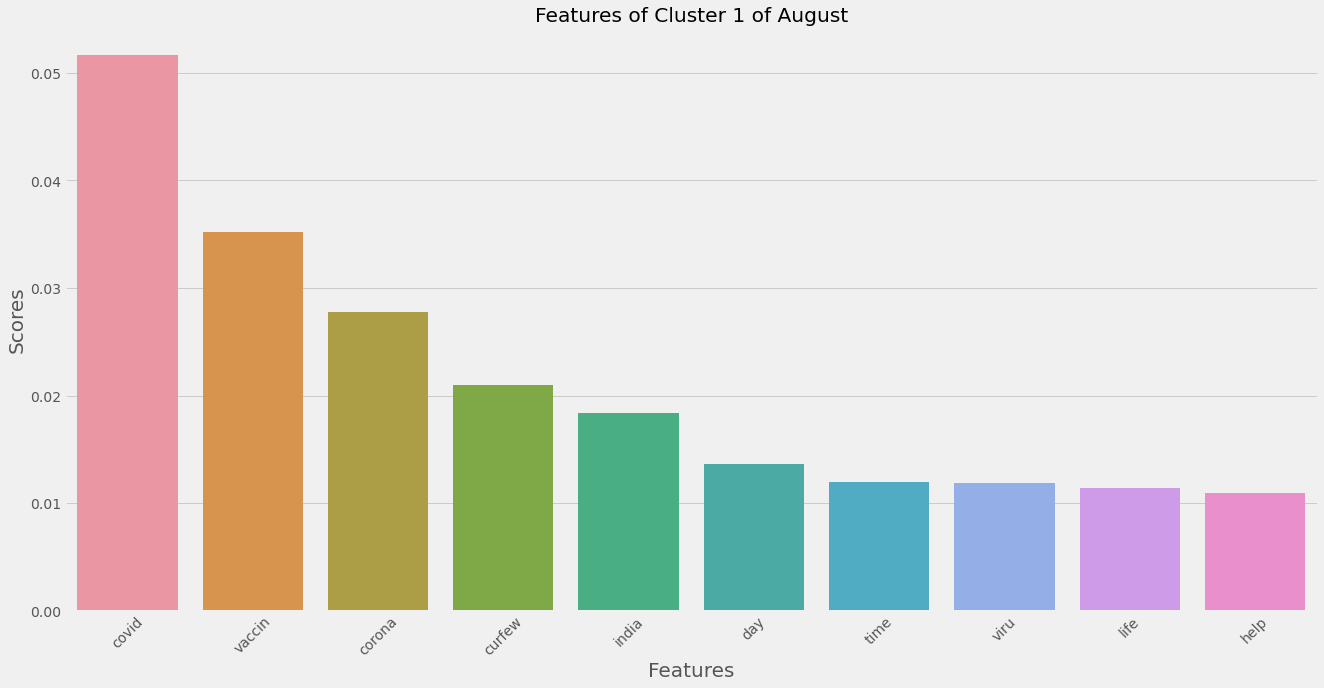

In [40]:

# Figure Size
fig = plt.figure(figsize =(20, 10))
 
# Horizontal Bar Plot
sns.barplot(x='features',y='score',data=august_cluster[0]).set(title="Features of Cluster 1 of August")
plt.xlabel('Features',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.xticks(rotation=45)
# Show Plot
plt.show()

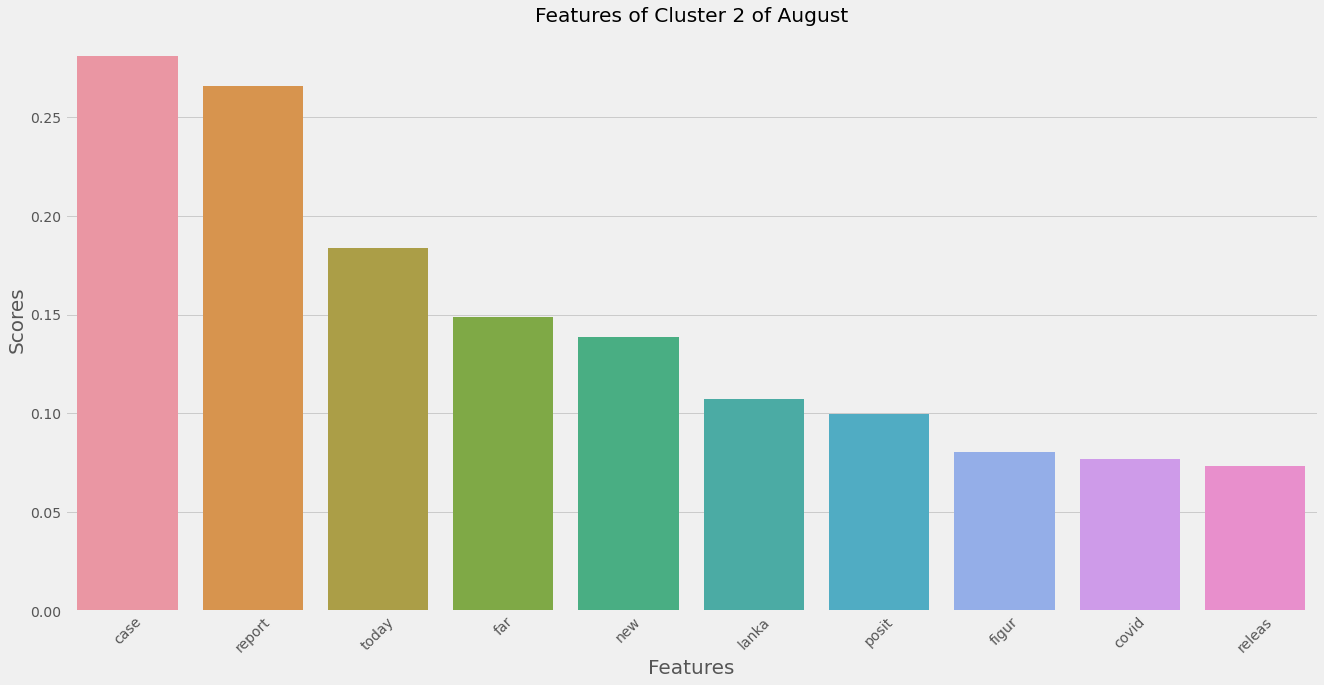

In [41]:

# Figure Size
fig = plt.figure(figsize =(20, 10))
 
# Horizontal Bar Plot
sns.barplot(x='features',y='score',data=august_cluster[1]).set(title="Features of Cluster 2 of August")
plt.xlabel('Features',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.xticks(rotation=45)
# Show Plot
plt.show()

In [42]:
K1=dfs1[0]
K2=dfs1[1]

In [43]:
august_bw=pd.read_csv('AugustTopWords.csv')

In [44]:
t=august_bw[:30]

In [45]:
c1=[]
p=0
c2=[]
q=0
for i in range(0,30):
    for j in range(0,100):
        if(t.words[i]==K1['features'][j]):
            c1.append(K1['features'][j])
            p=p+1
for i in range(0,30):
    for j in range(0,100):
        if(t.words[i]==K2['features'][j]):
            c2.append(K1['features'][j])
            q=q+1

In [46]:
print(p)
print(q)

25
16


### Tweet Grouping

In [47]:
label=kmeans.labels_
august['label']=label
august.head(3)

,tweet,clean_tweet,hastags,attherate,urls,emojis,label
0,Line of Treatment for Covid-19 Hydroquinone I...,treatment covid hydroquinon ivermectin zincovi...,[],[],[],[],0
1,"Yes, it's Oxygen and Remdesivir Versus Hindu-M...",oxygen remdesivir versu hindumuslim agenda tim...,[],[],[],[],0
2,@KDMCOfficial one of my pts needs remdesivir a...,remdesivir tociluzimab urgent wid icu bed avai...,[],['@KDMCOfficial'],[],[],0


In [48]:
np.unique(august['label'])

array([0, 1])

In [49]:
august['label'].value_counts()

0    1626
1      72
Name: label, dtype: int64

In [50]:
august_cluster_1=august[august.label ==0]
august_cluster_2=august[august.label ==1]

In [51]:
august_cluster_1.to_csv('AugustCluster1Tweet.csv')
august_cluster_2.to_csv('AugustCluster2Tweet.csv')

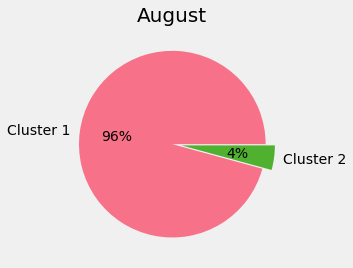

In [52]:
count=august['label'].value_counts()
tweet_freq_cluster=[]
tweet_freq_cluster.append(count[0])
tweet_freq_cluster.append(count[1])
cluster_name=['Cluster 1','Cluster 2']
explode = [0, 0.1]
palette_color = sns.color_palette("husl", 3)
  
# plotting data on chart
plt.pie(tweet_freq_cluster, labels=cluster_name, colors=palette_color,   explode=explode,autopct='%.0f%%')
plt.title("August",fontsize=20)
# displaying chart
plt.show()